<a href="https://colab.research.google.com/github/SharmilaR03/BT-KNN/blob/main/CLASSIFICATION_OF_BOTNET_USING_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load dataset
file_path = '/content/Tuesday-WorkingHours.pcap_ISCX.csv'
data = pd.read_csv(file_path)

In [4]:
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64


In [5]:
# Drop missing values (if any)
data.dropna(inplace=True)

In [6]:
# Encode categorical labels (if needed)
label_encoder = LabelEncoder()
if 'Label' in data.columns:
    data['Label'] = label_encoder.fit_transform(data['Label'])

In [7]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [8]:
# Select features and target
X = data.drop(columns=[' Label'])  # Assuming 'Label' is the target column
y = data[' Label']

In [9]:
# Convert all feature values to numeric (handle non-numeric cases)
X = X.apply(pd.to_numeric, errors='coerce')

In [10]:
# Fill any remaining NaN values with the median of the column
X.fillna(X.median(), inplace=True)

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Explicitly check and replace any remaining infinite values
print("Checking for infinite values:", np.isinf(X_train).sum().sum(), "in train, ", np.isinf(X_test).sum().sum(), "in test")
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

Checking for infinite values: 88 in train,  24 in test


In [13]:
# Ensure all values are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [14]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [18]:
# Predictions
y_pred = knn.predict(X_test_scaled)

In [19]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     44931
 FTP-Patator       1.00      1.00      1.00      1546
 SSH-Patator       0.99      0.98      0.99       640

    accuracy                           1.00     47117
   macro avg       1.00      0.99      0.99     47117
weighted avg       1.00      1.00      1.00     47117



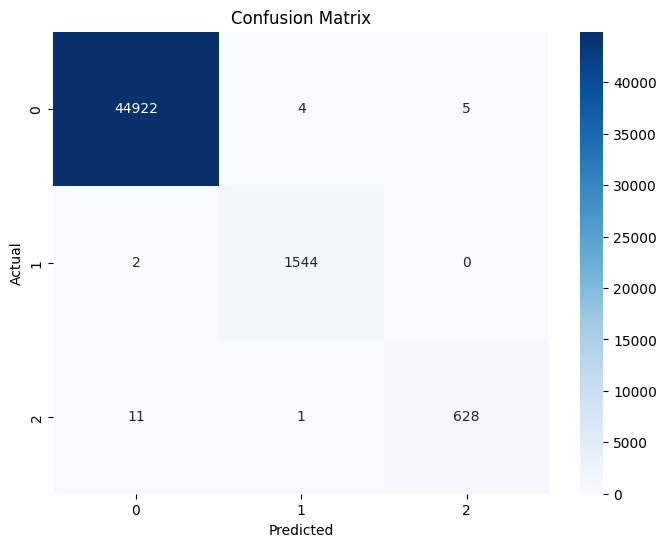

In [20]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()